In [119]:
import os
import datetime as dt
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision as tv

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import lightning as L


In [120]:
tickers = [
    "AXP",
    "AMGN",
    "AAPL",
    "BA",
    "CAT",
    "CSCO",
    "CVX",
    "GS",
    "HD",
    "HON",
    "IBM",
    "INTC",
    "JNJ",
    "KO",
    "JPM",
    "MCD",
    "MMM",
    "MRK",
    "MSFT",
    "NKE",
    "PG",
    "TRV",
    "UNH",
    "CRM",
    "VZ",
    "V",
    "WBA",
    "WMT",
    "DIS",
    "DOW",
]
companies = [
    "American Express Co",
    "Amgen Inc",
    "Apple Inc",
    "Boeing Co",
    "Caterpillar Inc",
    "Cisco Systems Inc",
    "Chevron Corp",
    "Goldman Sachs Group Inc",
    "Home Depot Inc",
    "Honeywell International Inc",
    "International Business Machines Corp",
    "Intel Corp",
    "Johnson & Johnson",
    "Coca-Cola Co",
    "JPMorgan Chase & Co",
    "McDonald`s Corp",
    "3M Co",
    "Merck & Co Inc",
    "Microsoft Corp",
    "Nike Inc",
    "Procter & Gamble Co",
    "Travelers Companies Inc",
    "UnitedHealth Group Inc",
    "Salesforce Inc",
    "Verizon Communications Inc",
    "Visa Inc",
    "Walgreens Boots Alliance Inc",
    "Walmart Inc",
    "Walt Disney Co",
    "Dow Inc",
]

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [121]:
dow30_comps = pd.DataFrame()

dfs = []

for i in range(0,30):
    comp = pd.read_csv("dow30/"+ str(tickers[i]) + ".csv", delimiter = ",", decimal = ".",
        names = ['Date', str(tickers[i])], header = 0, index_col = "Date", parse_dates=True)

    dow30_comps = pd.merge(dow30_comps, comp, left_index = True, right_index=True, how = "outer")

# dow30_comps = dow30_comps[::-1]

# flip the axes
# dow30_comps = dow30_comps.transpose()
dow30_comps

,AXP,AMGN,AAPL,BA,CAT,CSCO,CVX,GS,HD,HON,...,PG,TRV,UNH,CRM,VZ,V,WBA,WMT,DIS,DOW
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,82.4862,128.146,24.6030,113.64,72.9602,21.6306,79.6307,168.606,86.2397,85.0994,...,71.7389,87.6229,89.2398,59.24,32.5344,62.6089,60.0756,72.2517,87.377,NaN
2015-01-05,80.3047,126.631,23.9110,112.87,69.1070,21.2005,76.4608,163.344,84.4242,83.4778,...,71.3935,86.5639,87.7692,58.17,32.2624,61.2261,58.8871,72.0425,86.100,NaN
2015-01-06,78.5938,122.554,23.9130,111.53,68.6632,21.1926,76.4217,160.031,84.1641,83.2828,...,71.0699,85.7815,87.5940,57.20,32.5868,60.8294,59.0377,72.5979,85.644,NaN
2015-01-07,80.3097,126.807,24.2521,113.27,69.7275,21.3890,76.3623,162.451,87.0610,83.8857,...,71.4459,87.2449,88.4922,56.93,32.3770,61.6476,60.5505,74.5233,86.520,NaN
2015-01-08,81.4471,126.386,25.1822,115.26,70.4437,21.5520,78.1052,165.029,88.9668,85.4096,...,72.2568,89.0608,92.7127,58.59,33.0704,62.4737,61.2998,76.0984,87.414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-12,174.3300,225.680,189.7700,217.11,253.6000,50.7400,159.6400,326.400,317.5200,208.5200,...,148.8500,171.1200,451.7000,227.28,34.8600,242.2100,30.3200,155.0400,90.150,54.11
2023-07-13,174.2400,227.660,190.5400,216.85,255.8600,51.5300,157.5100,328.680,314.6000,208.7100,...,148.9500,168.2200,447.7500,230.37,34.6400,243.3100,29.7400,154.1300,90.470,54.21
2023-07-14,173.3900,227.430,190.6900,213.12,255.6200,50.3800,153.5800,326.190,316.5000,206.1400,...,150.0500,165.9500,480.1700,229.33,34.0100,243.1600,29.2000,154.6600,88.620,52.92


In [122]:
# turn dow_comps into returns data
dow30_comps_returns = dow30_comps.pct_change()
# replace nan with 0
dow30_comps_returns = dow30_comps_returns.fillna(0)
# dow30_comps_returns

dow30_comps_rets_cumprod = dow30_comps_returns.add(1).cumprod().sub(1)*100
# dow30_comps_rets_cumprod

In [123]:
dow30_comps_returns = dow30_comps_returns.transpose()

In [124]:
dow30 = pd.read_csv("indices/dow30.csv", delimiter = ",", decimal = ".", index_col='Date', parse_dates=True)

dow30 = dow30[::-1]
dow30

,Close
Date,
2015-01-02,17.0887
2015-01-05,16.1994
2015-01-06,15.7756
2015-01-07,16.3844
2015-01-08,17.2768
...,...
2023-07-12,59.3300
2023-07-13,59.4300
2023-07-14,60.0300


In [125]:
vals = dow30_comps_returns.values
vals

array([[ 0.00000000e+00, -2.64468481e-02, -2.13051042e-02, ...,
        -4.87832874e-03,  1.15346906e-02,  1.51091852e-02],
       [ 0.00000000e+00, -1.18224525e-02, -3.21959078e-02, ...,
        -1.01027849e-03,  1.80275250e-03,  2.07601826e-02],
       [ 0.00000000e+00, -2.81266512e-02,  8.36435114e-05, ...,
         7.87236276e-04,  1.73055745e-02, -1.34027527e-03],
       ...,
       [ 0.00000000e+00, -2.89543360e-03,  7.70933824e-03, ...,
         3.43865568e-03,  1.22850123e-03, -1.80820149e-03],
       [ 0.00000000e+00, -1.46148300e-02, -5.29616725e-03, ...,
        -2.04487675e-02, -3.45294516e-02,  4.55820477e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.37963475e-02, -9.25925926e-03,  1.04901774e-02]])

In [126]:
# train_data, test_data = train_test_split(vals, test_size=0.2, random_state=42)
# get the first 1719 data items of each row as the training data to tensor
train_data = vals[:, :1719]
test_data = vals[:, :1719]
train_data.shape

(30, 1719)

In [151]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(torch.Tensor(train_data))
train_loader = data.DataLoader(train_dataset, batch_size=30, shuffle=True)

test_dataset = TensorDataset(torch.Tensor(test_data))

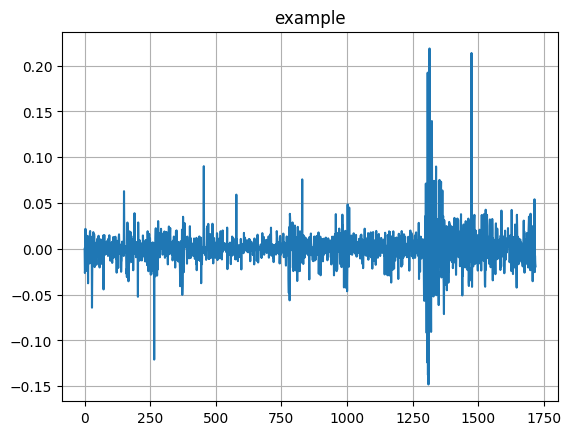

In [128]:
plt.grid()
plt.plot(np.arange(0, 1719), train_data[0])
plt.title("example")
plt.show()

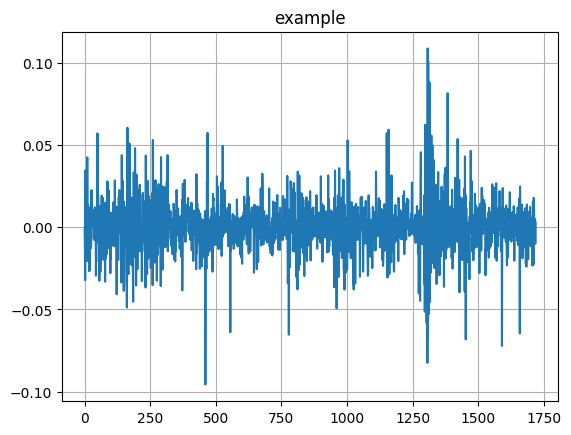

In [129]:
plt.grid()
plt.plot(np.arange(0, 1719), train_data[1])
plt.title("example")
plt.show()

In [130]:
encoder = nn.Sequential(
    nn.Linear(1719, 300), nn.ReLU(), nn.Linear(300, 30), nn.ReLU(), nn.Linear(30, 5)
)
decoder = nn.Sequential(
    nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 300), nn.ReLU(), nn.Linear(300, 1719), nn.Tanh()
)

In [133]:
class DeepAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(1719, 300),
            nn.ReLU(),
            nn.Linear(300, 30),
            nn.ReLU(),
            nn.Linear(30, 5)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(5, 30),
            nn.ReLU(),
            nn.Linear(30, 300),
            nn.ReLU(),
            nn.Linear(300, 1719),
            nn.Tanh()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

    # def configure_optimizers(self):
    #     return torch.optim.Adam(self.parameters(), lr=1e-3)

In [142]:
dae = DeepAutoEncoder()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(dae.parameters(), lr=1e-3)

In [143]:
# train the model
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for batch in train_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        x = batch[0]
        outputs = dae(x)
        loss = criterion(outputs, x)
        # backward pass: compute gradient of the loss with respect to model parameters
        optimizer.zero_grad()
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        print(f"epoch {epoch} batch {i} loss {loss.item()}")

epoch 0 batch 29 loss 0.0056170192547142506
epoch 1 batch 29 loss 0.0034888526424765587
epoch 2 batch 29 loss 0.0021668756380677223
epoch 3 batch 29 loss 0.0013829077361151576
epoch 4 batch 29 loss 0.0009364435099996626
epoch 5 batch 29 loss 0.0006938591250218451
epoch 6 batch 29 loss 0.0005716237938031554
epoch 7 batch 29 loss 0.0005141157889738679
epoch 8 batch 29 loss 0.0004838774329982698
epoch 9 batch 29 loss 0.0004598413361236453


In [156]:
test_dataset[0][0]

tensor([ 0.0000, -0.0264, -0.0213,  ..., -0.0074, -0.0162, -0.0192])

In [158]:
# test model

print(dae(test_dataset[0][0]))

trial = dae(test_dataset[0][0])

tensor([ 0.0064, -0.0320, -0.0374,  ...,  0.0030, -0.0073,  0.0080],
       grad_fn=<TanhBackward0>)


In [161]:
trial1 = trial.detach().numpy()

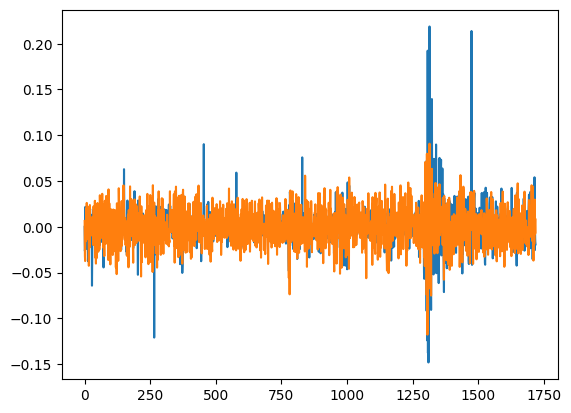

In [163]:
plt.plot(test_dataset[0][0])
plt.plot(trial1)